<a href="https://colab.research.google.com/github/ThivyaTS/cnc-colab-data-versioning/blob/main/cnc_anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




---


# 1. Data Exploration


---



In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv('/content/drive/MyDrive/cnc-project/data_v1_train/train.csv')
train.head()

,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,1,wax,6,4.0,unworn,yes,yes
1,2,wax,20,4.0,unworn,yes,yes
2,3,wax,6,3.0,unworn,yes,yes
3,4,wax,6,2.5,unworn,no,NaN
4,5,wax,20,3.0,unworn,no,NaN


### a. Basic cleaning

In [5]:
mapping = {'Prep': 0,
 'Layer 1 Up': 1,
 'Layer 1 Down': 2,
 'Repositioning': 3,
 'Layer 2 Up': 4,
 'Layer 2 Down': 5,
 'Layer 3 Up': 6,
 'Layer 3 Down': 7,
 'End': 8}



---


### **ii. combining data from train.csv into respective experiment data**


---



In [6]:
frames = []
for i in range(1,19):
    ex_num = '0' + str(i) if i < 10 else str(i)
    frame = pd.read_csv("/content/drive/MyDrive/cnc-project/data_v1_experiment/experiment_{}.csv".format(ex_num))

    ex_result_row = train[train['No'] == i]

    frame['Machining_Process'].replace(mapping, inplace=True)

    frame['feedrate'] = ex_result_row.iloc[0]['feedrate']
    frame['clamp_pressure'] = ex_result_row.iloc[0]['clamp_pressure']
    frame['machining_finalized'] = ex_result_row.iloc[0]['machining_finalized']
    frame['tool_condition'] = ex_result_row.iloc[0]['tool_condition']
    frame['material']= ex_result_row.iloc[0]['material']
    frames.append(frame)

<ipython-input-6-36376871>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  frame['Machining_Process'].replace(mapping, inplace=True)
<ipython-input-6-36376871>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [7]:
frames[0]

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,feedrate,clamp_pressure,machining_finalized,tool_condition,material
0,198.0,0.000,0.00,198.0,0.0,0.000000,0.18,0.0207,329.0,2.77,...,12.0,1.0,0.0,50.0,Starting,6,4.0,yes,unworn,wax
1,198.0,-10.800,-350.00,198.0,-13.6,-358.000000,-10.90,0.1860,328.0,23.30,...,12.0,1.0,4.0,50.0,0,6,4.0,yes,unworn,wax
2,196.0,-17.800,-6.25,196.0,-17.9,-0.000095,-8.59,0.1400,328.0,30.60,...,12.0,1.0,7.0,50.0,0,6,4.0,yes,unworn,wax
3,194.0,-18.000,0.00,194.0,-17.9,-0.000095,-6.11,0.1300,327.0,30.30,...,12.0,1.0,7.0,50.0,0,6,4.0,yes,unworn,wax
4,193.0,-17.900,-18.80,192.0,-17.9,0.000095,-5.70,0.1140,328.0,30.50,...,12.0,1.0,7.0,50.0,0,6,4.0,yes,unworn,wax
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,141.0,0.175,87.50,141.0,0.0,0.000000,-2.84,0.0522,325.0,7.39,...,12.0,1.0,132.0,50.0,end,6,4.0,yes,unworn,wax
1051,141.0,-0.150,-87.50,141.0,0.0,0.000000,-1.85,0.0522,325.0,2.69,...,12.0,1.0,132.0,50.0,end,6,4.0,yes,unworn,wax
1052,141.0,-0.175,-87.50,141.0,0.0,0.000000,-2.20,0.0527,325.0,2.22,...,12.0,1.0,132.0,50.0,end,6,4.0,yes,unworn,wax
1053,141.0,0.150,87.50,141.0,0.0,0.000000,-4.02,0.0502,326.0,5.80,...,12.0,1.0,132.0,50.0,end,6,4.0,yes,unworn,wax




---


### **ii. combining all the experiment data into one Dataframe by column**


---



In [8]:
combined_df = pd.concat(frames, axis=0)

In [9]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25286 entries, 0 to 2252
Data columns (total 53 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          25286 non-null  float64
 1   X1_ActualVelocity          25286 non-null  float64
 2   X1_ActualAcceleration      25286 non-null  float64
 3   X1_CommandPosition         25286 non-null  float64
 4   X1_CommandVelocity         25286 non-null  float64
 5   X1_CommandAcceleration     25286 non-null  float64
 6   X1_CurrentFeedback         25286 non-null  float64
 7   X1_DCBusVoltage            25286 non-null  float64
 8   X1_OutputCurrent           25286 non-null  float64
 9   X1_OutputVoltage           25286 non-null  float64
 10  X1_OutputPower             25286 non-null  float64
 11  Y1_ActualPosition          25286 non-null  float64
 12  Y1_ActualVelocity          25286 non-null  float64
 13  Y1_ActualAcceleration      25286 non-null  float64
 

<Axes: title={'center': 'Tool Condition Distribution'}, xlabel='tool_condition'>

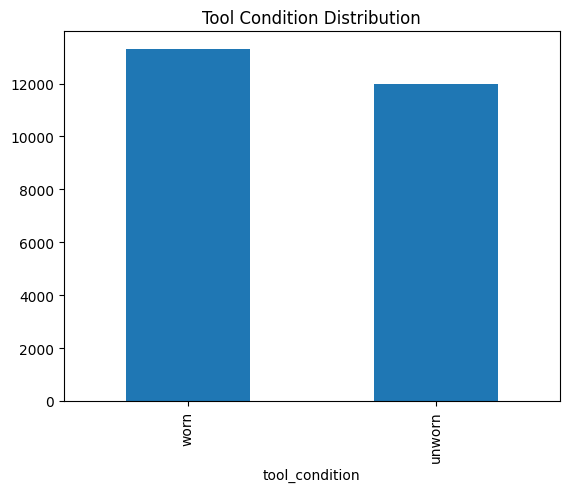

In [10]:
combined_df['tool_condition'].value_counts().plot(kind='bar', title='Tool Condition Distribution')



---

### iii. **basic pre-processing to convert the object types into int**
---

In [11]:
# Selecting object (categorical) columns
cat_cols = combined_df.select_dtypes(include=['object']).columns

# Printing unique values for each categorical column
for col in cat_cols:
    print(f"Column: {col}")
    print(combined_df[col].unique())  # or use .value_counts() for frequencies
    print("\n")

Column: Machining_Process
['Starting' 0 1 2 3 4 5 6 7 'end' 8]


Column: machining_finalized
['yes' 'no']


Column: tool_condition
['unworn' 'worn']


Column: material
['wax']




In [12]:
from sklearn.preprocessing import LabelEncoder

# Select object (categorical) columns
cat_cols = combined_df.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each categorical column
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    combined_df[col] = le.fit_transform(combined_df[col].astype(str))
    label_encoders[col] = le  # Save encoders for inverse transform later

In [13]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25286 entries, 0 to 2252
Data columns (total 53 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          25286 non-null  float64
 1   X1_ActualVelocity          25286 non-null  float64
 2   X1_ActualAcceleration      25286 non-null  float64
 3   X1_CommandPosition         25286 non-null  float64
 4   X1_CommandVelocity         25286 non-null  float64
 5   X1_CommandAcceleration     25286 non-null  float64
 6   X1_CurrentFeedback         25286 non-null  float64
 7   X1_DCBusVoltage            25286 non-null  float64
 8   X1_OutputCurrent           25286 non-null  float64
 9   X1_OutputVoltage           25286 non-null  float64
 10  X1_OutputPower             25286 non-null  float64
 11  Y1_ActualPosition          25286 non-null  float64
 12  Y1_ActualVelocity          25286 non-null  float64
 13  Y1_ActualAcceleration      25286 non-null  float64
 

In [14]:
path = '/content/drive/MyDrive/cnc-project/data_v2_combined/combined_data.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  combined_df.to_csv(f)



---


## b. Basic Structure Check


---



In [15]:
combined_df.describe()

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,feedrate,clamp_pressure,machining_finalized,tool_condition,material
count,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,2.528600e+04,25286.000000,25286.000000,...,25286.0,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,25286.0
mean,159.052045,-0.288657,0.094264,159.050700,-0.283076,0.253215,-0.469714,6.603073e-02,326.945859,7.986942,...,12.0,1.003441,47.345013,16.542039,3.899114,7.123942,3.368168,0.914538,0.526299,0.0
std,19.330873,5.658260,93.877623,19.331144,5.664309,72.594951,4.220750,3.700384e-02,1.459937,7.710379,...,0.0,0.349055,43.826214,19.620219,2.482190,6.167036,0.615639,0.279574,0.499318,0.0
min,141.000000,-20.400000,-1280.000000,141.000000,-20.000000,-1000.000000,-23.400000,2.780000e-19,320.000000,0.000000,...,12.0,0.000000,0.000000,3.000000,0.000000,3.000000,2.500000,0.000000,0.000000,0.0
25%,145.000000,-2.050000,-31.300000,145.000000,-2.050000,0.000000,-3.930000,4.150000e-02,326.000000,2.590000,...,12.0,1.000000,2.000000,3.000000,2.000000,3.000000,3.000000,1.000000,0.000000,0.0
50%,153.000000,0.000000,0.000000,153.000000,0.000000,0.000000,-0.666000,6.680000e-02,327.000000,7.140000,...,12.0,1.000000,39.000000,6.000000,4.000000,3.000000,3.000000,1.000000,1.000000,0.0
75%,162.000000,0.200000,25.000000,162.000000,0.000000,0.000000,3.140000,9.130000e-02,327.000000,10.200000,...,12.0,1.000000,85.000000,20.000000,6.000000,6.000000,4.000000,1.000000,1.000000,0.0
max,198.000000,50.700000,1440.000000,198.000000,50.000000,1000.000000,27.100000,3.800000e-01,331.000000,75.400000,...,12.0,4.000000,135.000000,50.000000,10.000000,20.000000,4.000000,1.000000,1.000000,0.0


In [16]:
combined_df.isnull().sum()

,0
X1_ActualPosition,0
X1_ActualVelocity,0
X1_ActualAcceleration,0
X1_CommandPosition,0
X1_CommandVelocity,0
X1_CommandAcceleration,0
X1_CurrentFeedback,0
X1_DCBusVoltage,0
X1_OutputCurrent,0
X1_OutputVoltage,0




---

## **c. Target Variable Exploration (tool_condition)**


---



<Axes: title={'center': 'Tool Condition Distribution (1 : worn , 0 : unworn)'}, xlabel='tool_condition'>

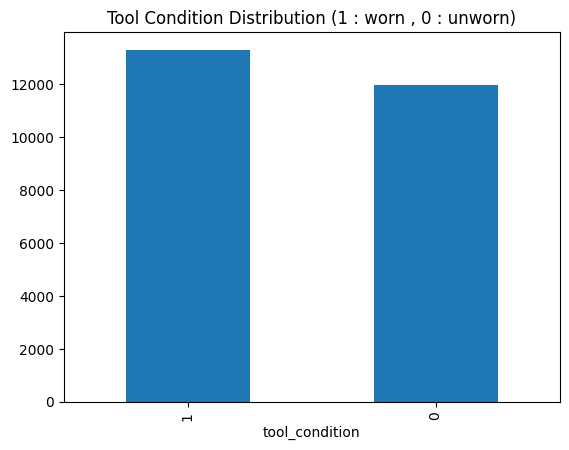

In [17]:
combined_df['tool_condition'].value_counts().plot(kind='bar', title='Tool Condition Distribution (1 : worn , 0 : unworn)')



---


## **d. Correlation Analysis**


---



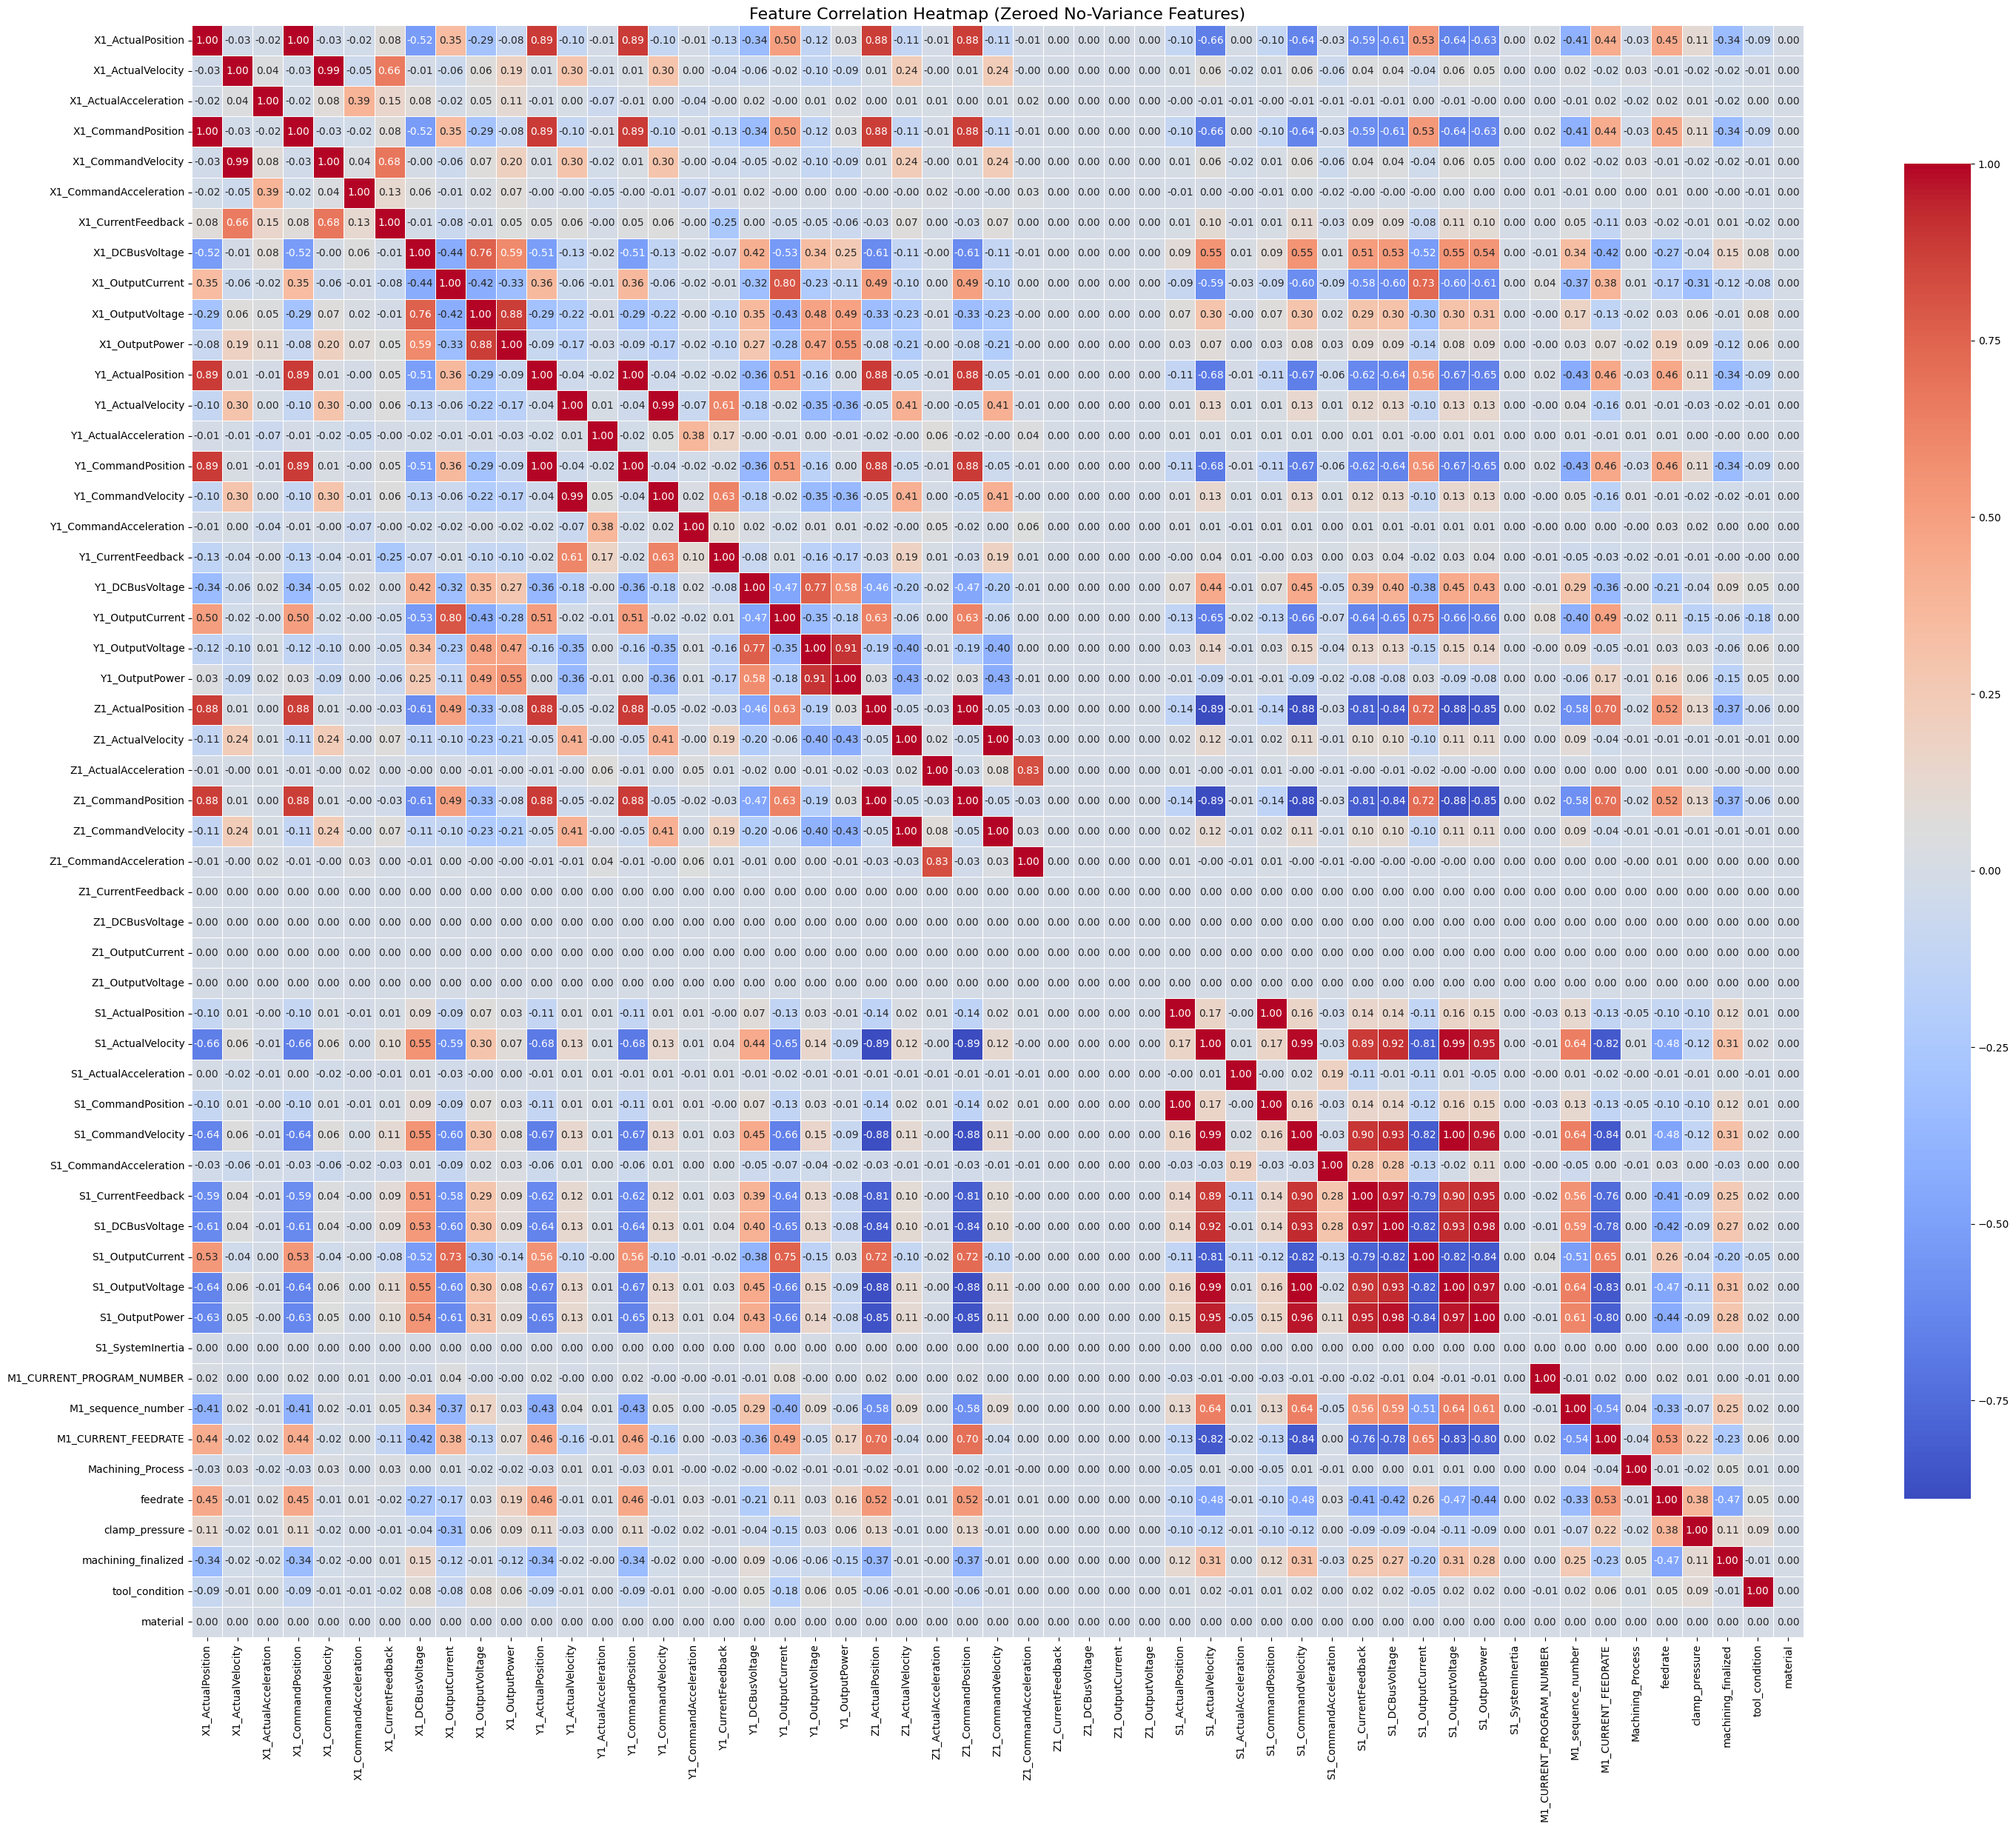

In [21]:
# Identify features with no variance
no_variance_cols = combined_df.loc[:, combined_df.nunique() == 1].columns

# Compute the correlation matrix
corr_matrix = combined_df.corr()

# Set correlation to 0 for no-variance features (rows and columns)
for col in no_variance_cols:
    corr_matrix.loc[col, :] = 0
    corr_matrix.loc[:, col] = 0

# Plot the heatmap
plt.figure(figsize=(30, 25))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Feature Correlation Heatmap (Zeroed No-Variance Features)", fontsize=16)
plt.tight_layout()
plt.show()



---


## **e. Time-Series Plots (for sensor signals)**


---



array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

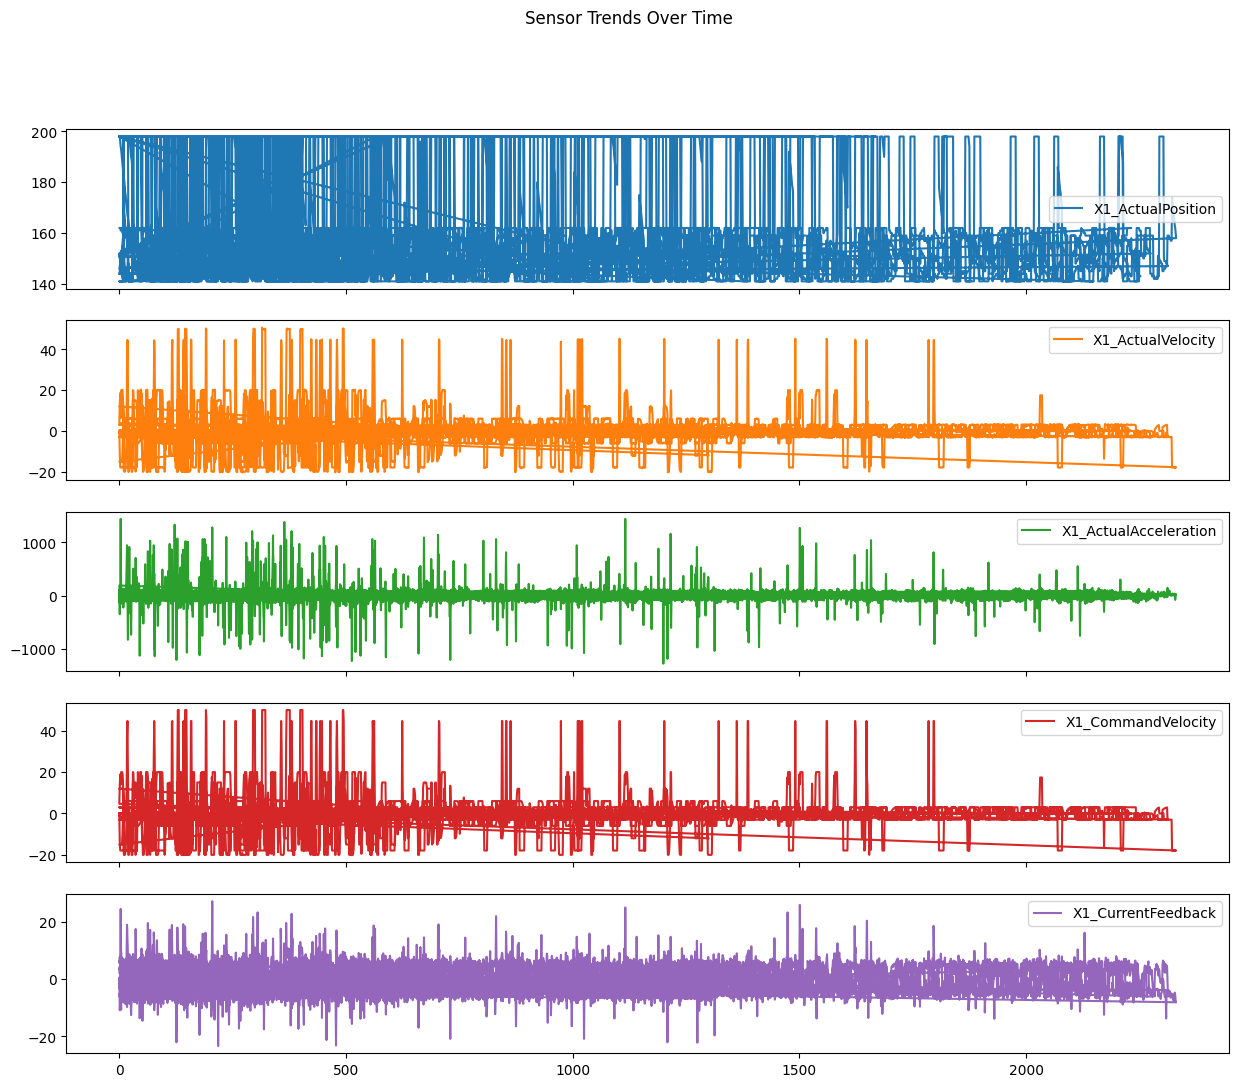

In [19]:
sensor_cols = ['X1_ActualPosition', 'X1_ActualVelocity', 'X1_ActualAcceleration',
               'X1_CommandVelocity', 'X1_CurrentFeedback']

combined_df[sensor_cols].plot(subplots=True, figsize=(15, 12), title='Sensor Trends Over Time')




---


## **f. Distribution Analysis**


---



array([[<Axes: title={'center': 'X1_OutputCurrent'}>,
        <Axes: title={'center': 'X1_OutputVoltage'}>],
       [<Axes: title={'center': 'X1_ActualVelocity'}>, <Axes: >]],
      dtype=object)

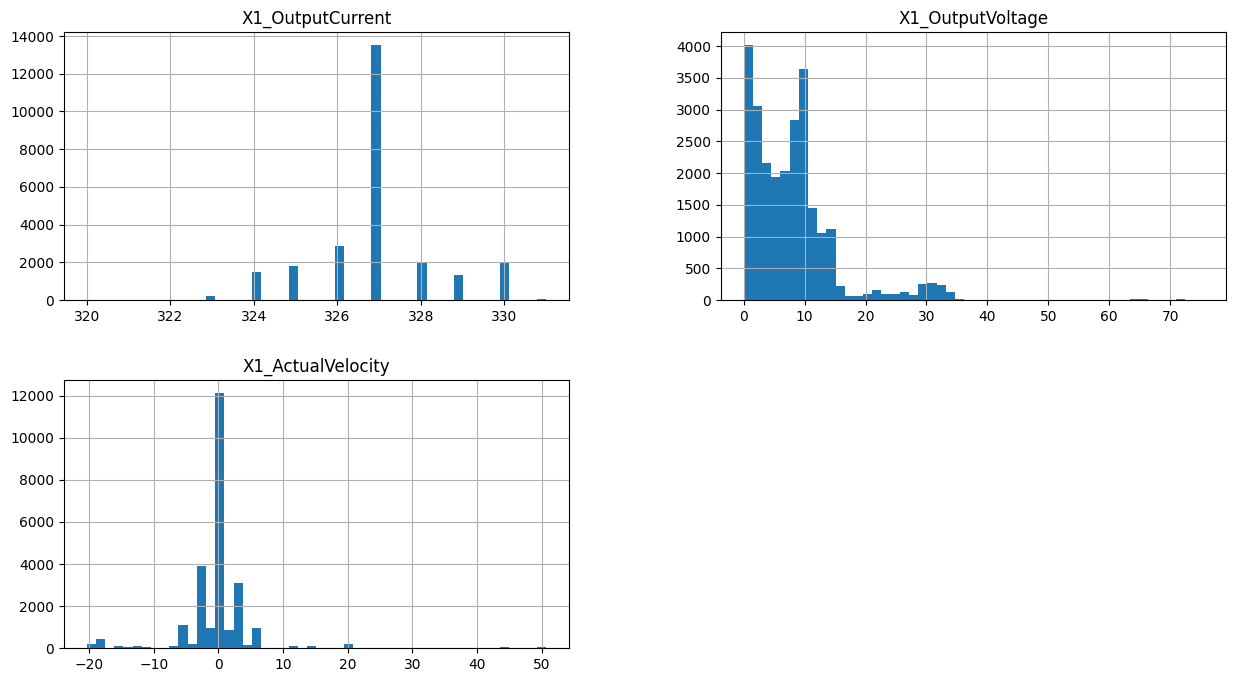

In [20]:
combined_df[['X1_OutputCurrent', 'X1_OutputVoltage', 'X1_ActualVelocity']].hist(bins=50, figsize=(15,8))

<Axes: xlabel='Machining_Process'>

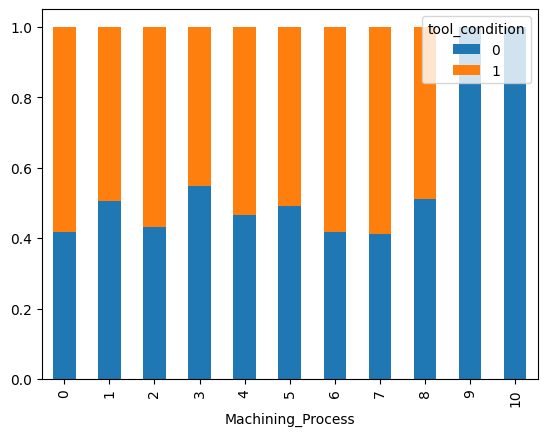

In [23]:
combined_df.groupby('Machining_Process')['tool_condition'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)


In [24]:
combined_df[combined_df['X1_ActualAcceleration'] > combined_df['X1_ActualAcceleration'].quantile(0.99)]

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,feedrate,clamp_pressure,machining_finalized,tool_condition,material
27,151.0,-17.200,188.0,151.0,-14.30,358.000000,-1.970,0.0687,328.0,23.50,...,12.0,1.0,2.0,50.0,0,6,4.0,1,0,0
68,148.0,3.400,1030.0,148.0,6.00,125.000000,17.100,0.2060,326.0,18.00,...,12.0,1.0,19.0,6.0,1,6,4.0,1,0,0
228,148.0,-0.875,238.0,148.0,-6.00,-125.000000,-13.200,0.2540,326.0,14.60,...,12.0,1.0,35.0,6.0,2,6,4.0,1,0,0
312,159.0,0.875,644.0,159.0,-5.50,-875.000000,-2.070,0.1560,326.0,4.69,...,12.0,1.0,45.0,6.0,2,6,4.0,1,0,0
338,144.0,-5.300,294.0,144.0,-5.99,0.787000,-7.670,0.1390,326.0,16.00,...,12.0,1.0,45.0,6.0,2,6,4.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,148.0,0.550,406.0,148.0,3.00,281.000000,0.932,0.0417,327.0,2.24,...,12.0,1.0,79.0,3.0,6,3,2.5,1,1,0
1796,143.0,44.300,812.0,143.0,44.70,-0.000095,18.500,0.3010,323.0,67.80,...,12.0,1.0,92.0,50.0,7,3,2.5,1,1,0
1817,144.0,-1.750,487.0,144.0,-3.00,0.056900,-3.700,0.1110,327.0,5.29,...,12.0,1.0,87.0,3.0,7,3,2.5,1,1,0
2129,148.0,1.300,219.0,148.0,3.00,0.000000,16.100,0.2360,327.0,12.80,...,12.0,1.0,38.0,3.0,8,3,2.5,1,1,0
